# PyTorch Introduction

Welcome to the introduction of PyTorch. PyTorch is a scientific computing package targeted for two main purposes: 

1. A replacement for NumPy with the ability to use the power of GPUs.

2. A deep learning framework that enables the flexible and swift building of neural network models.

Let's get started!


### Goals of this tutorial

- Understanding PyTorch's Tensor and neural networks libraries at an overview level.

- Training a neural network using PyTorch.

## (Optional) Mount folder in Colab

Uncomment thefollowing cell to mount your gdrive if you are using the notebook in google colab:

In [1]:
"""
from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive/i2dl/exercise_07'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))
"""

"\nfrom google.colab import drive\nimport os\n\ngdrive_path='/content/gdrive/MyDrive/i2dl/exercise_07'\n\n# This will mount your google drive under 'MyDrive'\ndrive.mount('/content/gdrive', force_remount=True)\n# In order to access the files in this notebook we have to navigate to the correct folder\nos.chdir(gdrive_path)\n# Check manually if all files are present\nprint(sorted(os.listdir()))\n"

## Enable GPUs on Colab

Having a library that has GPU support is one thing, the other is actually owning the hardware. Alternatively, you can use google colab though we have to manually enable it.

To enable GPU support in Google Colab go to `Menu > Runtime > Change runtime type` and enable the GPU hardware accelerator to speed up your trainings considerably. However, this functionality might not be available at any time.

![images/colab_gpu.png](./images/colab_gpu.png)


# Installing PyTorch

Pytorch provides support for accelerating computation using CUDA enabled GPU's. If your workstation has an NVIDIA GPU, install PyTorch along with the CUDA component.

#### Install [PyTorch](https://pytorch.org/) and [torchvision](https://github.com/pytorch/vision)

For this class we will use the current Pytorch version 1.11. To install, please uncomment and run the proper line in the upcoming cell depending on your operating system (and CUDA setup). We won't go into details of installing

In [2]:
# Install a pip package in the current Jupyter kernel
import sys

# For google colab
# !python -m pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 -f https://download.pytorch.org/whl/torch_stable.html

# For Linux and probably Windows (CPU)
# !{sys.executable} -m pip install torch==1.11.0+cpu torchvision==0.12.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

# For Linux and probably Windows (Prerequisites: Nvidia GPU + CUDA toolkit 11.3)
!{sys.executable} -m pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

# For OS X/Mac
# !{sys.executable} -m pip install torch==1.11.0 torchvision==0.12.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu113/torch-1.11.0%2Bcu113-cp310-cp310-linux_x86_64.whl (1637.0 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0
    Uninstalling torch-1.12.0:
      Successfully uninstalled torch-1.12.0
You should consider upgrading via the '/home/ml/anaconda3/envs/i2dl/bin/python -m pip install --upgrade pip' command.


<div class="alert alert-block alert-warning">
    <b>Nvidia GPU</b>
    <p>If you have a rather recent Nvidia GPU, you can go ahead and install the CUDA toolkit together with a current version of cudnn (though it is possible to use other versions as long as you build it yourself). Afterwards, you can run the respective line in the cell above.</p>
    <p>There are multiple setups on how to install those on both Linux and Windows, but it depends on your setup. If you want to utilize your GPU you have to go through those steps. Use the forum for help if you get stuck.</p>
    <br>
    <b>Google Colab Pytorch Installation Time</b>
    <p>Google colab might use an older/newer version of pytorch. Since we are mostly using defualt functionality, you should be fine by using the default colab version to avoid the long installation time at your own risk.</p>
</div>

#### Checking PyTorch Installation and Version

In [3]:
import torch
import torchvision
print(f"PyTorch version Installed: {torch.__version__}\nTorchvision version Installed: {torchvision.__version__}\n")
if not torch.__version__.startswith("1.11"):
    print("you are using an another version of PyTorch. We expect PyTorch 1.11.0. You may continue using your version but it"
          " might cause dependency and compatibility issues.")
if not torchvision.__version__.startswith("0.12"):
    print("you are using an another version of torchvision. We expect torchvision 0.12. You can continue with your version but it"
          " might cause dependency and compatibility issues.")

PyTorch version Installed: 1.11.0+cu113
Torchvision version Installed: 0.12.0+cu113



That's the end of installation. Let's dive right into PyTorch!

# Getting Started

In this section you will learn the basic element Tensor and some simple operations in PyTorch.
The following block imports the required packages for the rest of the notebook.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

%load_ext autoreload
%autoreload 2
%matplotlib inline

## 1. Tensors

[`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) is the central class of PyTorch.
Tensors are similar to NumPy’s ndarrays. The advantage of using Tensors is that one can easily transfer them from CPU to GPU and therefore computations on tensors can be accelerated with a GPU.

## 1.1 Initializing Tensor
Let us construct a NumPy array and a tensor of shape (2,3) directly from data values.

In [5]:
# Initializing the Numpy Array
array_np = np.array([[1,2,3],[5,6,7]]) #NumPy array
# Initializing the Tensor
array_ts = torch.tensor([[1,2,3],[4,5,6]]) # Tensor

print("Variable array_np:\nDatatype: {}\nShape: {}".format(type(array_np), array_np.shape))
print("Values:\n", array_np)
print("\n\nVariable array_ts:\nDatatype {}\nShape: {}".format(type(array_ts), array_ts.shape))
print("Values:\n", array_ts)

Variable array_np:
Datatype: <class 'numpy.ndarray'>
Shape: (2, 3)
Values:
 [[1 2 3]
 [5 6 7]]


Variable array_ts:
Datatype <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
Values:
 tensor([[1, 2, 3],
        [4, 5, 6]])


## 1.2 Conversion between NumPy array and Tensor

The conversion between NumPy ndarray and PyTorch tensor is quite easy.


In [6]:
# Conversion
array_np = np.array([1, 2, 3])
# Conversion from  a numpy array to a Tensor
array_ts_2 = torch.from_numpy(array_np) 

# Conversion from  Tensor to numpy array
array_np_2 = array_ts_2.numpy() 

# Change a value of the np_array
array_np_2[1] = -1 

# Changes in the numpy array will also change the values in the tensor
assert(array_np[1] == array_np_2[1])

<div class="alert alert-block alert-info"><b></b> During the conversion, both ndarray and Tensor share the same memory address. Changes in value of one will
affect the other.</div>

## 1.3 Operations on Tensor

### 1.3.1 Indexing

We can use the NumPy array-like indexing for Tensors.

In [7]:
# Let us take the first two columns from the original tensor array and save it in a new one
b = array_ts[:2, :2] 

# Let's assign the value of first column of the new variable to be zero 
b[:, 0] = 0 
print(b)

tensor([[0, 2],
        [0, 5]])


We will now select elements which satisfy a particular condition. In this example, let's find those elements of tensor which are array greater than one.

In [8]:
# Index of the elements with value greater than one
mask = array_ts > 1 
new_array = array_ts[mask]
print(new_array)

tensor([2, 3, 5, 6])


Let's try performing the same operation in a single line of code!

In [9]:
c = array_ts[array_ts>1]

# Is the result same as the array from the previous cell?
print(c == new_array)

tensor([True, True, True, True])


### 1.3.2 Mathematical operations on Tensor

#### Element-wise operations on Tensors

In [10]:
x = torch.tensor([[1,2],[3,4]])
y = torch.tensor([[5,6],[7,8]])

# Elementwise Addition of the tensors
# [[ 6.0  8.0]
#  [10.0 12.0]]

# Addition - Syntax 1
print("x + y: \n{}".format(x + y))

# Addition - Syntax 2
print("x + y: \n{}".format(torch.add(x, y)))

# Addition - Syntax 3
result_add = torch.empty(2, 2)
torch.add(x, y, out=result_add)
print("x + y: \n{}".format(result_add))

x + y: 
tensor([[ 6,  8],
        [10, 12]])
x + y: 
tensor([[ 6,  8],
        [10, 12]])
x + y: 
tensor([[ 6.,  8.],
        [10., 12.]])


Similar syntax holds for other element-wise operations such as subtraction and multiplication.

When dividing two integers in NumPy as well PyTorch, the result is always a **float**.   
For example,

In [11]:
x_np = np.array([[1,2],[3,4]])
y_np = np.array([[5,6],[7,8]])
print(x_np / y_np)

[[0.2        0.33333333]
 [0.42857143 0.5       ]]


## 1.4 Devices

When training a neural network, it is important to make sure that all the required tensors as well as the model are on the same device. Tensors can be moved between the CPU and GPU using `.to` method.

Let us check if a GPU is available. If it is available, we will assign it to `device` and move the tensor `x` to the GPU.

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

print(f"Original device: {x.device}") # "cpu"

tensor = x.to(device)
print(f"Current device: {tensor.device}") #"cpu" or "cuda"

cuda:0
Original device: cpu
Current device: cuda:0


So `x` has been moved on to a CUDA device for those who have a GPU; otherwise it's still on the CPU.

<div class="alert alert-block alert-info"><b>Tip:</b> Try including the <b>.to(device)</b> calls in your codes. It is then easier to port the code to run on a GPU.</div>

# 2. Training a classifier with PyTorch

Now that we are introduced PyTorch tensors, we will look at how to use PyTorch to train neural networks. We will do the following steps:

1. Load data 
2. Define a two-layer network
3. Define a loss function and optimizer
4. Train the network
5. Test the network

## 2.1 Loading Datasets

The general procedure of loading data is :
- Extract data from  source
- Transform the data into a suitable form (for example, to a Tensor)
- Put our data into an object to make it easy to access further on

### 2.1.1 Loading the Housing Price dataset

We'll use both our `DataLoader` class from the previous exercises and PyTorch's `DataLoader` to load the house price dataset that we used in Exercise 4 to classify the price of the houses.

Let us fetch the data and setup the `Dataset` class as in Exercise 3

In [13]:
from exercise_code.data.csv_dataset import CSVDataset, get_exercise5_transform
from exercise_code.data.dataloader import DataLoader as our_DataLoader

# dataloading and preprocessing steps as in ex04 
target_column = 'SalePrice'
i2dl_exercises_path = os.path.dirname(os.path.abspath(os.getcwd()))
root_path = os.path.join(i2dl_exercises_path, "datasets", 'housing')
housing_file_path = os.path.join(root_path, "housing_train.csv")
download_url = 'https://i2dl.dvl.in.tum.de/downloads/housing_train.zip'

# Set up the transform to get two prepared columns
select_two_columns_transform = get_exercise5_transform()

# Set up the dataset
our_csv_dataset = CSVDataset(target_column=target_column, root=root_path, download_url=download_url, mode="train",
                             transform=select_two_columns_transform)

98304it [00:00, 681539.13it/s]                                                  
/home/ml/Downloads/exercise_07/exercise_code/data/csv_dataset.py:167: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mn, mx, mean = df.min(), df.max(), df.mean()


We will now set our `DataLoader` class to help us to load batches of data.

In [14]:
# Let's look at the first batch of the data
batch_size = 4
our_dataloader = our_DataLoader(our_csv_dataset, batch_size=batch_size)

for i, item in enumerate(our_dataloader):
    print('Batch {}'.format(i))
    for key in item:
        print("\nDictionary Key:",key)
        print("Value Type",type(item[key]))
        print("Shape of the Value",item[key].shape)
    
    if i+1 >= 1:
        break

Batch 0

Dictionary Key: features
Value Type <class 'numpy.ndarray'>
Shape of the Value (4, 2)

Dictionary Key: target
Value Type <class 'numpy.ndarray'>
Shape of the Value (4, 1)


In PyTorch we can use the [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) class to accomplish the same objective. It provides more parameters than our `DataLoader` class, such as easy multiprocessing using `num_workers`. You can refer the documentation to learn those additional features.

In [15]:
from torch.utils.data import DataLoader

pytorch_dataloader = DataLoader(our_csv_dataset, batch_size=batch_size)

# We can use the exact same way to iterate over samples
for i, item in enumerate(pytorch_dataloader):
    print('Batch {}'.format(i))
    for key in item:
        print("\nDictionary Key:",key)
        print("Value Type",type(item[key]))
        print("Shape of the Value",item[key].shape)
    
    if i+1 >= 1:
        break

Batch 0

Dictionary Key: features
Value Type <class 'torch.Tensor'>
Shape of the Value torch.Size([4, 2])

Dictionary Key: target
Value Type <class 'torch.Tensor'>
Shape of the Value torch.Size([4, 1])


<div class="alert alert-block alert-info">As seen above, both the data loaders load the data with the same batch size and the data contains 2 features and 1 target. The only difference here is that PyTorch's <code>DataLoader</code> will automatically transform the dataset into <b>Tensor</b> data type.</div>

### 2.1.2 Torchvision

Specifically for computer vision, the `torchvision` packages has data loaders for many common datasets such
as ImageNet, FashionMNIST, MNIST and additional data transformers for images in `torchvision.datasets` and `torch.utils.data.DataLoader` modules.

This is highly convenient and is useful in avoiding  to write boilerplate code.

Let's try loading the [`Fashion-MNIST`](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) dataset. It has  gray-scale images of size $28* 28$ belonging to 10 different classes of clothing accessories such as T-Shirt, Trousers, Sneakers.

`transforms.Compose` creates a series of transformation to prepare the dataset.
- `transforms.ToTensor` convert `PIL image` or numpy.ndarray $(H \times W\times C)$ in the range [0,255] to a `torch.FloatTensor` of shape $(C \times H \times W)$ in the range [0.0, 1.0].

- `transforms.Normalize` normalize a tensor image with the provided mean and standard deviation.

In [16]:
# Mean and standard deviations have to be sequences (e.g. tuples),hence we add a comma after the values
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))]) 

`datasets.FashionMNIST` downloads the Fashion MNIST dataset and transforms it using our previous cell definition.  
By setting the value of `train`, we get the training and test set.

In [17]:
fashion_mnist_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=True,
                                                          download=True, transform=transform)
fashion_mnist_test_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=False,
                                                          download=True, transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../datasets/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../datasets/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../datasets/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../datasets/FashionMNIST/raw




 `torch.utils.data.Dataloader` takes our training data or test data with parameter
`batch_size` and `shuffle`. The variable `batch_size` defines how many samples per batch to load. The variable `shuffle=True` makes the data reshuffled at every epoch.

In [18]:
fashion_mnist_dataloader = DataLoader(fashion_mnist_dataset, batch_size=8)
fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test_dataset, batch_size=8)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

Let's look at the first batch of data from the `fashion_mnist_dataloader`.

In [19]:
# We can use the exact same way to iterate over samples
for i, item in enumerate(fashion_mnist_dataloader):
    print('Batch {}'.format(i))
    image, label = item
    print(f"Datatype of Image: {type(image)}")
    print(f"Shape of the Image: {image.shape}")
    print(f"Label Values: {label}")

    if i+1 >= 1:
        break

Batch 0
Datatype of Image: <class 'torch.Tensor'>
Shape of the Image: torch.Size([8, 1, 28, 28])
Label Values: tensor([9, 0, 0, 3, 0, 2, 7, 2])


Since we loaded the data with `batch_size` 8, the shape of the input is (8, 1, 28, 28). 

Let's look at  some of the training images.

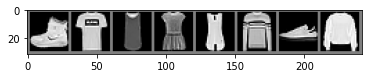

Ankle boot T-shirt/top T-shirt/top Dress T-shirt/top Pullover Sneaker Pullover


In [20]:
def imshow(img):
    img = img / 2 + 0.5 # unormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(fashion_mnist_dataloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

### 2.2 Defining the Neural Network 

We implemented the `ClassificationNet` class in Exercise 06. Let's use it here again for Fashion-MNIST.

Have a look at our lengthy implementation first/again to appreciate the upcoming shortness ;).

In [21]:
from exercise_code.networks.classification_net import ClassificationNet
hidden_size = 100
std = 1.0
model_ex06 = ClassificationNet(num_layer=2,input_size=1*28*28, hidden_size=hidden_size, std=std)

PyTorch provides a `nn.Module` that builds neural networks. Now, we will use it to define our network class.

In [22]:
import torch.nn as nn


class Net(nn.Module):
    def __init__(self, activation=nn.Sigmoid(),
                 input_size=1*28*28, hidden_size=100, classes=10):
        
        super(Net, self).__init__()
        self.input_size = input_size

        # Here we initialize our activation and set up our two linear layers
        self.activation = activation
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, classes)

    def forward(self, x):
        x = x.view(-1, self.input_size) # flatten
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)

        return x

Looking at the constructor of `Net`, we have,
 - `super().__init__` creates a class that inherits attributes and behaviors from another class.

 - `self.fc1` creates an affine layer with `input_size` inputs and `hidden_size` outputs.

 - `self.fc2` is the second affine layer.

The `Forward` function defines the forward pass of the mode.:

 - Input `x` is flattened with `x = x.view(-1, self.input_size)` to be able to use as input to the affine layer.

 - Apply `fc1`, `activation`, `fc2` sequentially to complete the network.
    

Central to all neural networks in PyTorch is the [`autograd`](https://pytorch.org/docs/stable/autograd.html) package. It provides automatic differentiation for all operations on Tensors. 
If we set the attribute `.requires_grad` of `torch.Tensor` as `True`, it tracks all operations applied on that tensor. Once all the computations are finished, the function `.backward()` computes the gradients into the `Tensor.grad` variable

<div class="alert alert-block alert-info">
Thanks to the <b>autograd</b> package, we just have to define the <b>forward()</b> function. We can use any of the Tensor operations in the <b>forward()</b>  function.
 The <b>backward()</b> function (where gradients are computed through back-propagation) is automatically defined by PyTorch.
    </div>

We can use `print()` to look at all the defined layers of the network (but it won't show the information of the forward pass).

The learned parameters of a model are returned by `[model_name].parameters()`. We can also access the parameters of different layers by `[model_name].[layer_name].parameters()`.

Let's create an instance of the `Net` model and look at the parameters matrix shape for each of the layers.

In [23]:
net = Net()
# Always remember to move the network to the GPU/CPU depending on device
net = net.to(device) 

print(net)

print("Shapes of the Parameter Matrix:")
for parameter in net.parameters():
        print(parameter.shape)

Net(
  (activation): Sigmoid()
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)
Shapes of the Parameter Matrix:
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


## 2.3 Defining the Loss function and optimizer

Since it is a multi-class classification, we will use the Cross-Entropy loss and optimize it using SGD with momentum. We had implemented SGD with momentum in Exercise 05. Have a look at the implementations in `exercise_code/networks/optimizer.py` and `exercise_code/networks/loss.py`.

In [24]:
from exercise_code.networks.optimizer import sgd_momentum
from exercise_code.networks.loss import CrossEntropyFromLogits

The `torch.nn` and `torch.optim` modules include a variety of loss functions and optimizers. We will initialize an instance of them.

In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 2.4 Training the network

We have completed setting up the dataloader, loss function as well as the optimizer. We are now all set for training the network.




In [26]:
# Initializing the list for storing the loss and accuracy

train_loss_history = [] # loss
train_acc_history = [] # accuracy

for epoch in range(2):

       
    running_loss = 0.0
    correct = 0.0
    total = 0
    
    # Iterating through the minibatches of the data
    
    for i, data in enumerate(fashion_mnist_dataloader, 0):
        
        # data is a tuple of (inputs, labels)
        X, y = data

        X = X.to(device)
        y = y.to(device)

        # Reset the parameter gradients  for the current  minibatch iteration 
        optimizer.zero_grad()

        
        y_pred = net(X)             # Perform a forward pass on the network with inputs
        loss = criterion(y_pred, y) # calculate the loss with the network predictions and ground Truth
        loss.backward()             # Perform a backward pass to calculate the gradients
        optimizer.step()            # Optimize the network parameters with calculated gradients

        
        # Accumulate the loss and calculate the accuracy of predictions
        running_loss += loss.item()
        _, preds = torch.max(y_pred, 1) #convert output probabilities of each class to a singular class prediction
        correct += preds.eq(y).sum().item()
        total += y.size(0)

        # Print statistics to console
        if i % 1000 == 999: # print every 1000 mini-batches
            running_loss /= 1000
            correct /= total
            print("[Epoch %d, Iteration %5d] loss: %.3f acc: %.2f %%" % (epoch+1, i+1, running_loss, 100*correct))
            train_loss_history.append(running_loss)
            train_acc_history.append(correct)
            running_loss = 0.0
            correct = 0.0
            total = 0

print('FINISH.')

[Epoch 1, Iteration  1000] loss: 1.543 acc: 55.81 %
[Epoch 1, Iteration  2000] loss: 0.904 acc: 71.59 %
[Epoch 1, Iteration  3000] loss: 0.745 acc: 74.36 %
[Epoch 1, Iteration  4000] loss: 0.660 acc: 76.65 %
[Epoch 1, Iteration  5000] loss: 0.613 acc: 78.79 %
[Epoch 1, Iteration  6000] loss: 0.578 acc: 79.47 %
[Epoch 1, Iteration  7000] loss: 0.556 acc: 80.17 %
[Epoch 2, Iteration  1000] loss: 0.522 acc: 81.77 %
[Epoch 2, Iteration  2000] loss: 0.508 acc: 81.99 %
[Epoch 2, Iteration  3000] loss: 0.510 acc: 81.99 %
[Epoch 2, Iteration  4000] loss: 0.487 acc: 82.93 %
[Epoch 2, Iteration  5000] loss: 0.483 acc: 83.39 %
[Epoch 2, Iteration  6000] loss: 0.471 acc: 83.62 %
[Epoch 2, Iteration  7000] loss: 0.471 acc: 83.30 %
FINISH.


So the general training pass is summarized below:

- `zero_grad()`: Zero the gradient buffers of all the model parameters to start the current minibatch iteration.

- `y_pred = net(X)`: Make a forward pass through the network by passing the images to the model to get the predictions, which are log probabilities of image belonging to each of the class.

- `loss = criterion(y_pred, y)`: Calculate the loss from the generated predictions and the training data `y`.

- `loss.backward()`: Perform a backward pass through the network to calculate the gradients for model parameters.

- `optimizer.step()`: Do an optimization step to update the model parameters using the calculated gradients.

We keep tracking the training loss and accuracy over time. The following plot shows average values for train loss and accuracy.

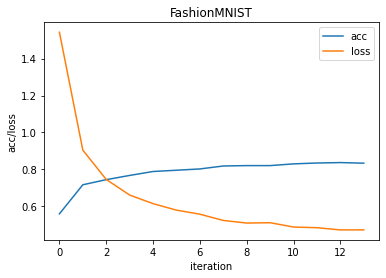

In [27]:
plt.plot(train_acc_history)
plt.plot(train_loss_history)
plt.title("FashionMNIST")
plt.xlabel('iteration')
plt.ylabel('acc/loss')
plt.legend(['acc', 'loss'])
plt.show()

## 2.5 Testing the performance of the model

We have trained the network for 2 passes over the entire training dataset. Let's check the model performance using the test data.
We will pass the test data to the model to predict the class label and check it against the ground-truth.


In [28]:
# obtain one batch of test images
dataiter = iter(fashion_mnist_test_dataloader)
images, labels = dataiter.__next__()
images, labels = images.to(device), labels.to(device)

# get sample outputs
outputs = net(images)
# convert output probabilites to predicted class
_, predicted = torch.max(outputs, 1)

We will visualize the results to display the test images and their labels in the following format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

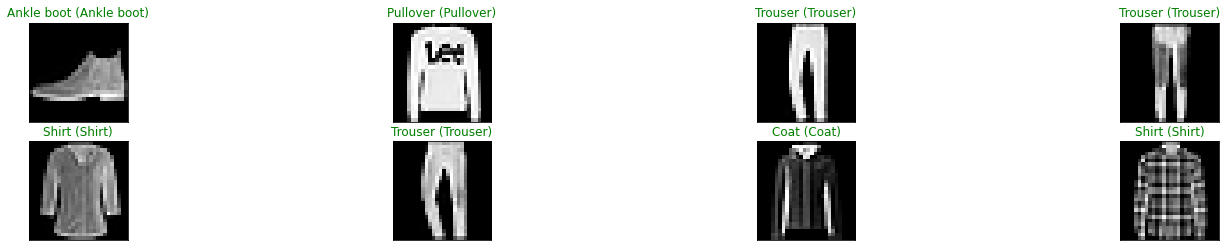

In [29]:
# prep images for display
if not isinstance(images, np.ndarray):
    images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25,4))
for idx in range(8):
    ax = fig.add_subplot(2, 8//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(f"{classes[predicted[idx]]} ({classes[labels[idx]]})",
                color="green" if predicted[idx]==labels[idx] else "red")

Let's find which classes of images performed well, and the classes that did not perform well!  
`torch.no_grad()` makes sure that gradients are not calculated for the tensors since we only are performing a forward pass.

In [30]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in fashion_mnist_test_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %11s: %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top: 81 %
Accuracy of     Trouser: 94 %
Accuracy of    Pullover: 77 %
Accuracy of       Dress: 89 %
Accuracy of        Coat: 76 %
Accuracy of      Sandal: 86 %
Accuracy of       Shirt: 42 %
Accuracy of     Sneaker: 91 %
Accuracy of         Bag: 94 %
Accuracy of  Ankle boot: 93 %


That's the end of the `PyTorch` Tutorial. In the next notebook, we will look at [`TensorBoard`](https://www.tensorflow.org/tensorboard) which helps us visualize the results of the training process.

## References

1. [PyTorch Tutorial](https://pytorch.org/tutorials/)

2. [Fashion MNIST dataset training using PyTorch](https://medium.com/@aaysbt/fashion-mnist-data-training-using-pytorch-7f6ad71e96f4)


